In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-top-100-songs-of-20152019/Spotify 2010 - 2019 Top 100.csv
/kaggle/input/spotify-top-100-songs-of-20152019/Spotify 2010 - 2019 Top 100 Songs.xlsx


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# **Importing the dataset**

In [3]:
songs = pd.read_csv("../input/spotify-top-100-songs-of-20152019/Spotify 2010 - 2019 Top 100.csv")
songs.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo


In [4]:
songs.artist

0                  3OH!3
1                  3OH!3
2             Aloe Blacc
3                  B.o.B
4                  B.o.B
              ...       
998     Young T & Bugsey
999           Young Thug
1000                 NaN
1001                 NaN
1002                 NaN
Name: artist, Length: 1003, dtype: object

# **Manipulating the Dataset in accordance.**

In [5]:
songs['top genre']

0         dance pop
1         dance pop
2          pop soul
3       atl hip hop
4       atl hip hop
           ...     
998       afroswing
999     atl hip hop
1000            NaN
1001            NaN
1002            NaN
Name: top genre, Length: 1003, dtype: object

In [6]:
# Information about the data columns
songs.info()

# Printing column labels
songs.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1000 non-null   object 
 1   artist         1000 non-null   object 
 2   top genre      1000 non-null   object 
 3   year released  1000 non-null   float64
 4   added          1000 non-null   object 
 5   bpm            1000 non-null   float64
 6   nrgy           1000 non-null   float64
 7   dnce           1000 non-null   float64
 8   dB             1000 non-null   float64
 9   live           1000 non-null   float64
 10  val            1000 non-null   float64
 11  dur            1000 non-null   float64
 12  acous          1000 non-null   float64
 13  spch           1000 non-null   float64
 14  pop            1000 non-null   float64
 15  top year       1000 non-null   float64
 16  artist type    1000 non-null   object 
dtypes: float64(12), object(5)
memory usage: 133.3+ KB


Index(['title', 'artist', 'top genre', 'year released', 'added', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year',
       'artist type'],
      dtype='object')

# **Dealing with NULL values**

* Dropping the NULL values(Using the simplest approach)

In [7]:
songs_missing_vals = (songs.isnull().sum())
print(songs_missing_vals[songs_missing_vals > 0])

title            3
artist           3
top genre        3
year released    3
added            3
bpm              3
nrgy             3
dnce             3
dB               3
live             3
val              3
dur              3
acous            3
spch             3
pop              3
top year         3
artist type      3
dtype: int64


In [8]:
songs2 = songs.fillna("Unkonwn")
songs2

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019.0,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019.0,Solo
1000,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn
1001,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn,Unkonwn


In [9]:
songs3 = songs2.drop(songs2.index[1000:1003], axis=0)
songs3

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018.0,2020‑06‑22,155.0,73.0,83.0,-4.0,12.0,45.0,313.0,1.0,22.0,86.0,2019.0,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019.0,2020‑06‑22,80.0,50.0,55.0,-9.0,80.0,41.0,190.0,23.0,7.0,85.0,2019.0,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019.0,2020‑06‑22,103.0,77.0,89.0,-5.0,9.0,46.0,177.0,1.0,7.0,68.0,2019.0,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo


# **Manipulating the data the to use non-numerical values**

In [10]:
s = (songs.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['title', 'artist', 'top genre', 'added', 'artist type']


# **Score from Approach 3 (One-Hot Encoding)**

We use the OneHotEncoder class from scikit-learn to get one-hot encodings. There are a number of parameters that can be used to customize its behavior.

* We set handle_unknown='ignore' to avoid errors when the validation data contains classes that aren't represented in the training data, and
setting sparse=False ensures that the encoded columns are returned as a numpy array (instead of a sparse matrix).

To use the encoder, we supply only the categorical columns that we want to be one-hot encoded. For instance, to encode the training data, we supply X_train[object_cols]. (object_cols in the code cell below is a list of the column names with categorical data, and so X_train[object_cols] contains all of the categorical data in the training set.)

In [11]:
#Approch 3 is to be coded and executed

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_songs = pd.DataFrame(OH_encoder.fit_transform(songs[object_cols]))

# **Plotting the dat**

# **Yet to be done**
**Grop the songs(column label = 'title') on the bases of artist column values**

<AxesSubplot:xlabel='artist type', ylabel='Count'>

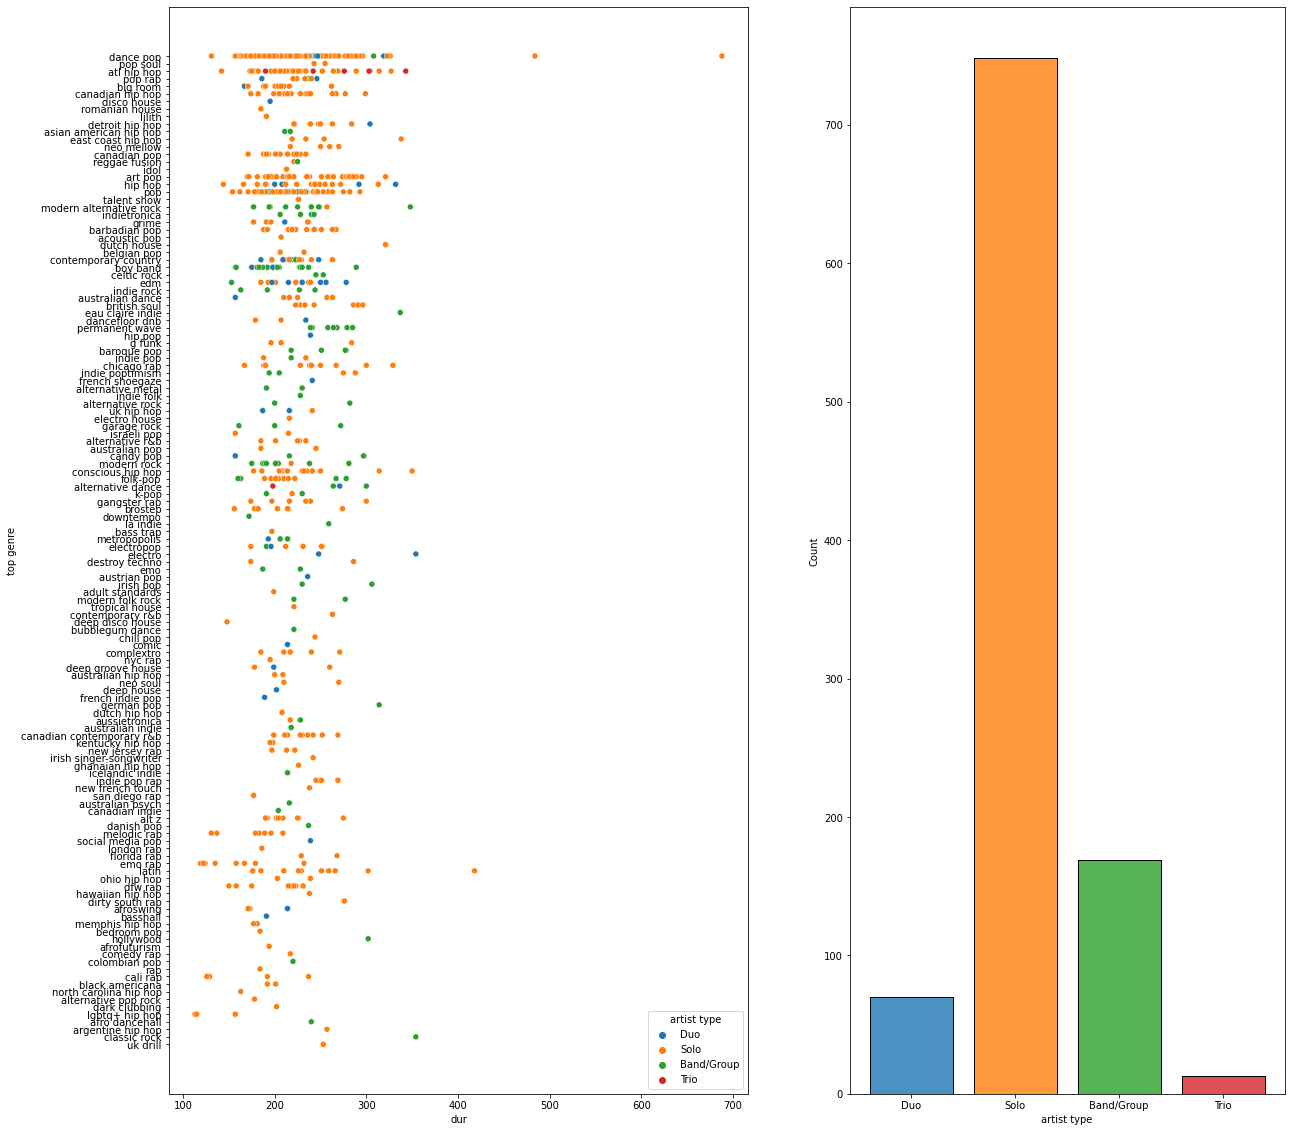

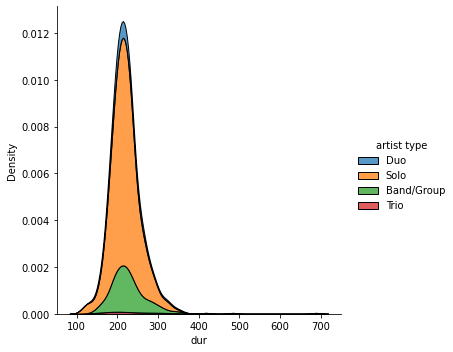

In [12]:
f, axs = plt.subplots(1, 2, figsize=(20, 20), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=songs, x="dur", y="top genre", hue="artist type", ax=axs[0])
sns.displot(data=songs, x="dur", hue="artist type", multiple="stack", kind="kde")
sns.histplot(data=songs, x="artist type", hue="artist type", shrink=.8, alpha=.8, legend=False, ax=axs[1])

In [13]:
# songs2 = songs2.artist.replace[]

In [14]:
# y = songs['dur']
# songs_features = ['top genre', '', '']
# X = songs[songs_features]

In [15]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)